<a href="https://colab.research.google.com/github/MsAnalyst/Marketing-and-Customer-Analytics/blob/main/Final_Project_Marketing_%26_Customer_Analytics_Dewi_Astuti_(Dewi_I4Zs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project - RFM Segmentation**

Marketing and Customer Analytics - Sekolah Data - Pacmann Academy

# <font color='blue'>**1. Introduction**</font>
---

### **a. Business Understanding**
---

The UK Company wants to create targeted marketing campaigns and also needs to allocate their marketing resources efficiently, but The UK Company recognizes that not all customers have the same needs, preferences, or purchasing behaviors.

The dataset was prepared by UCI Machine Learning Repository that collected transnational data from a UK-based and registered non-store online retail containing all the transactions occurring between 01/12/2010 and 09/12/2011. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### **b. Business Objectives**
---

The UK Company aims to personalize marketing strategies for the UK market to increase customer retention and maximize revenue with effective marketing spending in the next 3 months.

The company also wants to identify high-value customers to give them personalised marketing promotion.

### **c. Define the Problem**
---
How can we effectively segment our customer base to better understand customer behavior and implement targeted marketing strategies?


### **d. Business Questions**
---
1. What is the monthly general sales trend in the UK market?
2. What is the best-selling item in UK?
3. How many new customers each months?
4. How are the RFM segmentations based on the purchasing behavior records?

### **e. Modelling Task**
---
Task:
Clustering

Model used:
- Ranking based
- K-means

Cluster Evaluation:
Elbow method



# <font color='Blue'> **2. Importing data to Python** </font>
---

In [ ]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
import seaborn as sns
import datetime as dt
#to ignore warnings
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('bmh')
sns.set()


## **Import Data**
---

* Dataset information https://www.kaggle.com/datasets/carrie1/ecommerce-data
* Get the dataset 'retail_data.csv' in the link: https://drive.google.com/file/d/1EniqMDkIKz7YbLxctAm5-xUW6kCiuq6c/view?usp=drive_link



In [ ]:
#Import the data
df=pd.read_csv('retail_data.csv',encoding='latin1')

# <font color='Blue'> **3. Dataset** </font>
---
---

### **a. Data Descriptions**
---

In [ ]:
print("There are {} observations for {} variables.".format(df.shape[0],df.shape[1]))
df.head()

There are 541909 observations for 8 variables.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Data Variables:
- `InvoiceNo`: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
<br>
- `StockCode`: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. <br>
- `Description`: Product (item) name. Nominal. <br>
- `Quantity`: The quantities of each product (item) per transaction. Numeric. <br>
- `InvoiceDate`: Invoice Date and time. Numeric, the day and time when each transaction was generated. <br>
- `UnitPrice`: Unit price. Numeric, Product price per unit in sterling. <br>
- `CustomerID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. <br>
- `Country`: Country name. Nominal, the name of the country where each customer resides.
<br>

The dataset was prepared by UCI Machine Learning Repository that collected transnational data from a UK-based and registered non-store online retail containing all the transactions occurring between 01/12/2010 and 09/12/2011. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

In [ ]:
df["Country"].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

## **b. Data Preprocessing**

For this project, we will only use the data of the UK market, thus we will drop the other rows in the column Country.

In [ ]:
#Keep only the United Kingdom market data
df = df[df["Country"].isin(["United Kingdom"]) == True]

In [ ]:
#We exclude canceled orders from the data set.

print("The number of data (rows, columns) after we exclude the canceled orders from the dataset:")
df = df[~df["InvoiceNo"].str.contains("C", na = False)]

print(df.shape)


The number of data (rows, columns) after we exclude the canceled orders from the dataset:
(487622, 8)


In [ ]:
#Get the info on the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487622 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    487622 non-null  object 
 1   StockCode    487622 non-null  object 
 2   Description  486168 non-null  object 
 3   Quantity     487622 non-null  int64  
 4   InvoiceDate  487622 non-null  object 
 5   UnitPrice    487622 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      487622 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.5+ MB


In [ ]:
#Check the number of unique values of “Invoice”
print("The number of unique values of Invoice:")
print(df["InvoiceNo"].nunique())

The number of unique values of Invoice:
20122


**Treatment for Duplication & Null Values**

In [ ]:
#Check the proportion of duplicated data in each feature.
print("Duplicated data found:")
print(df.duplicated().sum())  # On duplicated data

#Remove duplicated data.
df.drop_duplicates(inplace = True) # To deleted duplicated data
print("Duplicated data now:")
print(df.duplicated().sum())  # On duplicated data

Duplicated data found:
5143
Duplicated data now:
0


In [ ]:
#Check the proportion of null values in each feature.
print("Null values found:")
print(df.isnull().sum()) # On null values

#Remove null values in the dataframe
df.dropna(inplace=True) # To deleted null values
print("Null values now:")
print(df.isnull().sum()) # On null values

Null values found:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133252
Country             0
dtype: int64
Null values now:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Result:
- There were 5,143 duplicated data and they have been handled.
- There were 1,454 null values in Description and 133,252 null values in CustomerID and they have been handled.

In [ ]:
df.nunique()

InvoiceNo      16649
StockCode       3645
Description     3844
Quantity         294
InvoiceDate    15615
UnitPrice        403
CustomerID      3921
Country            1
dtype: int64

**Outlier Observations**

<Axes: xlabel='TotalSales'>

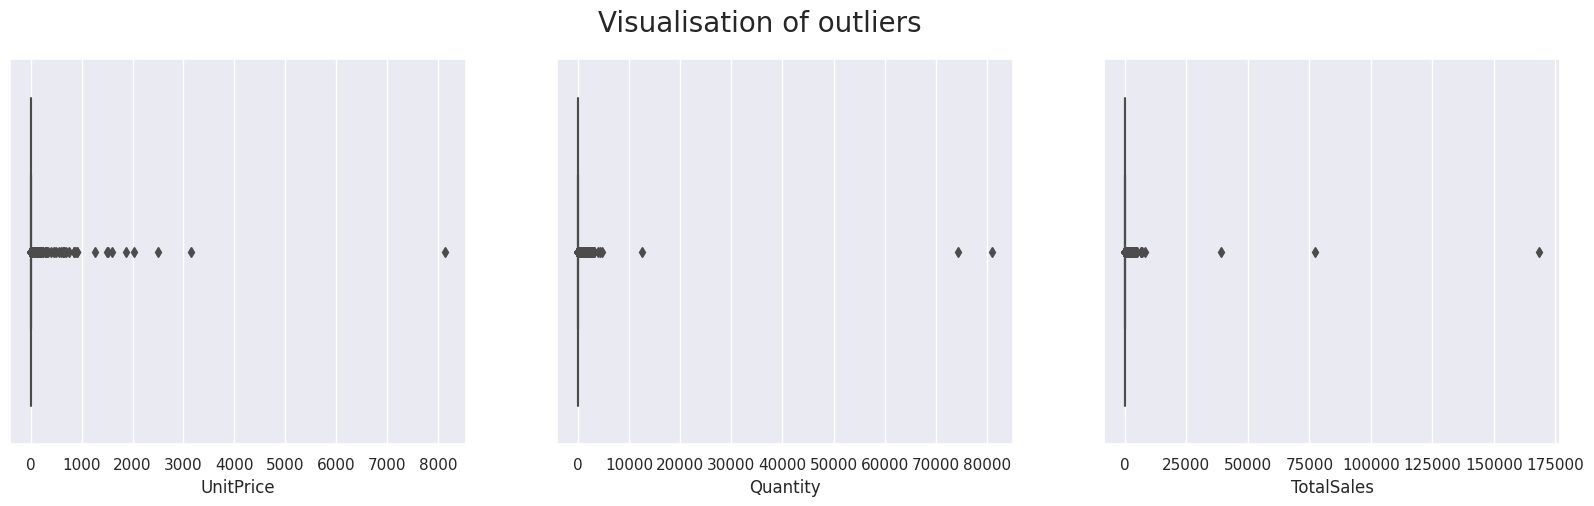

In [ ]:
df["TotalSales"] = df["Quantity"]*df["UnitPrice"]

fig = plt.figure(figsize = (20,5))
fig.suptitle("Visualisation of outliers",size=20)

axes = fig.add_subplot(1, 3, 1)
sns.boxplot(data=df,x="UnitPrice")

axes = fig.add_subplot(1, 3, 2)
sns.boxplot(data=df,x="Quantity")

axes = fig.add_subplot(1, 3, 3)
sns.boxplot(data=df,x="TotalSales")


In [ ]:

def outlier_thresholds(df, variable):
    quartile1 = df["Quantity"].quantile(0.01)
    quartile3 = df["UnitPrice"].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(df, variable):
    low_limit, up_limit = outlier_thresholds(df, variable)
    df.loc[(df["UnitPrice"] > up_limit), variable] = up_limit
    df.loc[(df["Quantity"] < low_limit), variable] = low_limit

replace_with_thresholds(df, "UnitPrice")
replace_with_thresholds(df, "Quantity")
#replace_with_thresholds(df)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,349227.0,12.181295,191.797470,1.0,2.00,4.00,12.00,80995.000
UnitPrice,349227.0,2.819721,2.914789,0.0,1.25,1.95,3.75,30.375
CustomerID,349227.0,15548.333625,1594.403077,12346.0,14191.00,15518.00,16931.00,18287.000
TotalSales,349227.0,20.860428,328.406035,0.0,4.20,10.20,17.85,168469.600


## **c. Exploratory Data Analysis**

In the EDA, we try to answer the first 3 questions, namely:
1. What is the monthly general sales trend in the UK market?
2. What is the best-selling item in UK?
3. How many new customers each months?

In [ ]:
# Separate Numerical and Categorical variables
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')
Numerical Variables:
['Quantity', 'UnitPrice', 'CustomerID', 'TotalSales']


In [ ]:
# Change datatype of InvoiceDate as datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
#df['Date'] = pd.to_datetime(df['InvoiceDate'], utc=False)
#df['Date'].dtypes

# Create column total sales
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,349227.0,12.181295,191.797470,1.0,2.00,4.00,12.00,80995.000
UnitPrice,349227.0,2.819721,2.914789,0.0,1.25,1.95,3.75,30.375
CustomerID,349227.0,15548.333625,1594.403077,12346.0,14191.00,15518.00,16931.00,18287.000
TotalSales,349227.0,20.582162,321.237917,0.0,4.20,10.20,17.85,168469.600


**Q1. What is the monthly general sales trend in the UK market?**
---

In [ ]:
general_trend = pd.DataFrame(data={'Date':pd.to_datetime(df.InvoiceDate).dt.date,
                                  'TotalSales':df.Quantity*df.UnitPrice})
general_trend = general_trend.groupby("Date")["TotalSales"].sum()
general_trend = pd.DataFrame(general_trend)

In [ ]:
general_trend.index = pd.to_datetime(general_trend.index)
general_trend_months = general_trend.groupby([general_trend.index.year,general_trend.index.month])['TotalSales'].sum()
general_trend_months = pd.DataFrame(general_trend_months)

In [ ]:
dates = []
dates.append(pd.to_datetime("201012",format="%Y%m"))
dates += [pd.to_datetime("2011"+str(month),format="%Y%m") for month in range(1,12)]

In [ ]:
rolling_days = general_trend.copy()
rolling_days["TotalSales"] = rolling_days["TotalSales"].rolling(window=30).mean()

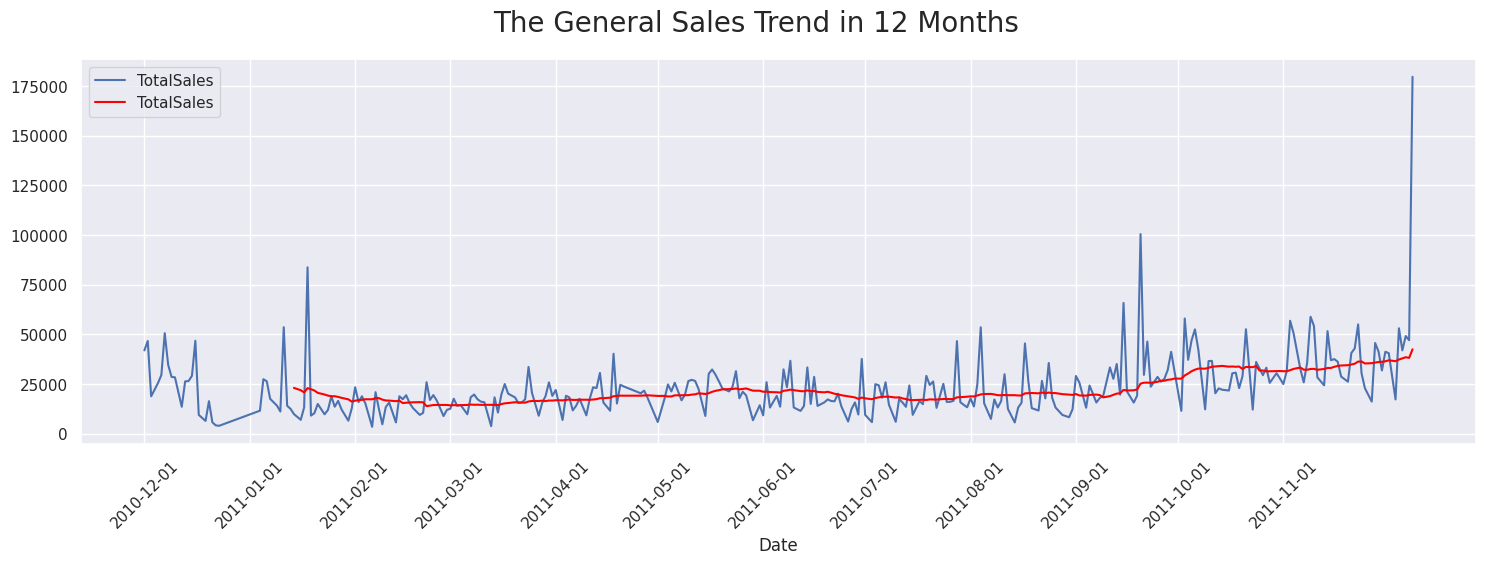

In [ ]:
plt.figure(figsize = (18,5)).suptitle('The General Sales Trend in 12 Months', fontsize=20)
sns.lineplot(data=general_trend)
sns.lineplot(data=rolling_days, palette=['red'])
plt.xticks(dates,rotation = 45)
plt.show()

In [ ]:
general_trend.index = pd.to_datetime(general_trend.index)
general_trend_months = general_trend.groupby([general_trend.index.year,general_trend.index.month])['TotalSales'].sum()
general_trend_months = pd.DataFrame(general_trend_months)

In [ ]:
general_trend_months

TotalSales
Date Date            
2010 12    492563.485
2011 1     438180.205
     2     352894.200
     3     461977.965
     4     404172.331
     5     539676.015
     6     483524.135
     7     482604.456
     8     493279.720
     9     788750.067
     10    813310.220
     11    967321.610
     12    469592.170

Based on the sales trend depicted in this graph spanning from December 2010 to December 2011, it appears that overall sales remained relatively consistent until September 2011. Subsequently, there was a significant surge in general sales. This upturn could potentially be associated with year-end festivities, a period when individuals tend to make more purchases.

**Q2. What is the best-selling item in UK?**
---

In [ ]:
#Rank the 5 most ordered products from most to least
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending=False).head(5)

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995.0
MEDIUM CERAMIC TOP STORAGE JAR,76919.0
WORLD WAR 2 GLIDERS ASSTD DESIGNS,49086.0
JUMBO BAG RED RETROSPOT,41878.0
WHITE HANGING HEART T-LIGHT HOLDER,34630.0



There are 2 best selling products: "paper craft, little birdie’ and “medium ceramic top storage bar”.

**Q3. How many new customers each month?**
---

In [ ]:
number_customers = df.groupby(df["InvoiceDate"].dt.to_period('M'))["CustomerID"].nunique()
number_customers = pd.DataFrame(data=number_customers).reset_index()
number_customers["Date"] = number_customers.InvoiceDate.dt.to_timestamp()

number_new_customers = []
customers_seen = []
for month in df["InvoiceDate"].dt.to_period('M').unique():
    customers = df[df["InvoiceDate"].dt.to_period('M') == month].CustomerID.unique()
    count=0
    for customer in customers:
        if customer not in customers_seen:
            count+=1
            customers_seen.append(customer)
    number_new_customers.append((month,count))
number_new_customers = pd.DataFrame(number_new_customers,columns=["Date","New customers"])
number_new_customers.Date = number_new_customers.Date.dt.to_timestamp()

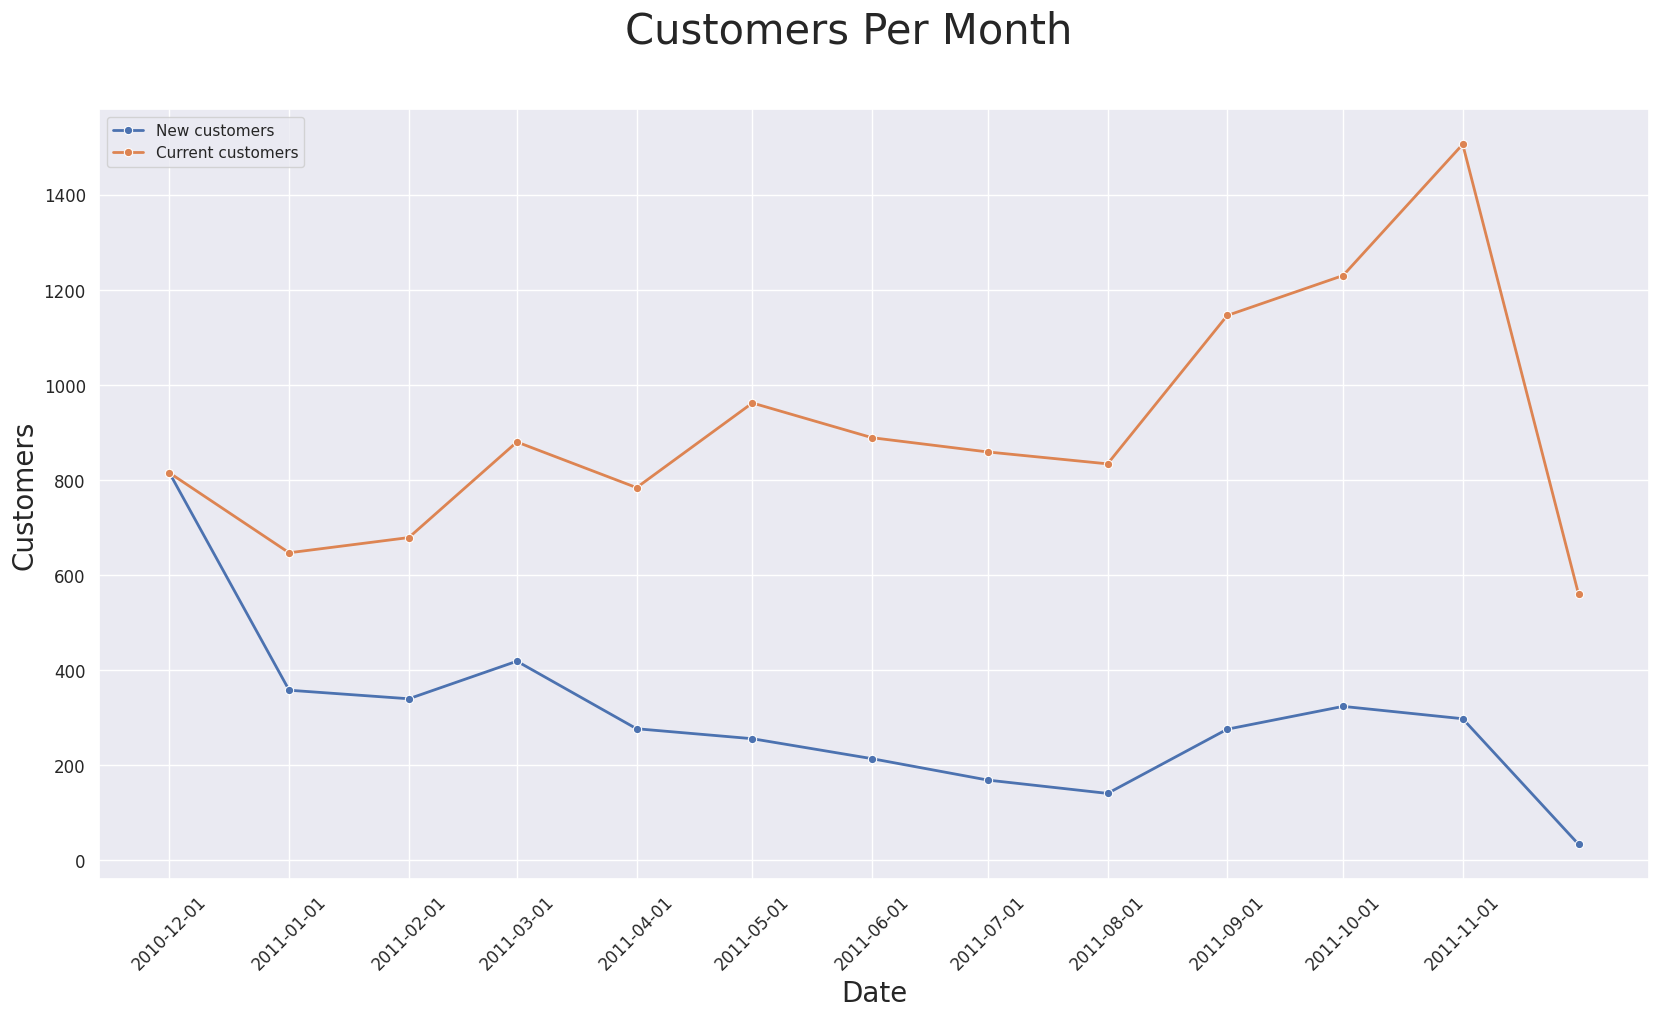

In [ ]:
fig  = plt.figure(figsize = (20,10)).suptitle('Customers Per Month', fontsize=30)
lineplot = sns.lineplot(data=number_new_customers,x="Date", y="New customers", marker="o",linewidth = 2, label="New customers")
sns.lineplot(data=number_customers,x="Date", y="CustomerID", marker="o",linewidth = 2, label="Current customers")

lineplot.set_xlabel("Date",fontsize=20)
lineplot.set_ylabel("Customers",fontsize=20)
plt.xticks(dates,rotation = 45,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# <font color='Blue'> **4. Methodology** </font>
---

### **a. RFM Table**
---

Preferably RFM is done for recent data and will be refreshed on a quarterly/half-yearly basis based on the business. The first step is to create an RFM Table.

RFM stands for a fundamental customer segmentation technique rooted in their buying patterns. This approach hinges on pinpointing these patterns by relying solely on three key customer data points:


- **Recency** <br>
It measures how recently a customer has engaged with the business. Recency = Reference date (e.g., today) - Customer last purchase date
- **Frequency** <br>
It measures how often a customer engages with the business. Frequency = Count number of transactions by each customer
- **Monetary** <br>
It refers to the total monetary value of a customer's transactions or purchases. Monetary = Product Price * Quantity Order

To calculate recency, we need to find out when the customer's most recent purchase was.

In [ ]:
#Determining the analysis date for the recency
df["InvoiceDate"].max()
today_date = dt.datetime(2011, 12, 11)
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'InvoiceNo': lambda num: num.nunique(),
                                     'UnitPrice': lambda UnitPrice: UnitPrice.sum()})
rfm.columns=["Recency","Frequency","Monetary"]
rfm = rfm[rfm["Monetary"] > 0]
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,3920.0,92.742092,99.533485,1.00,18.00,51.0000,143.00000,374.00
Frequency,3920.0,4.246939,7.206483,1.00,1.00,2.0000,5.00000,210.00
Monetary,3920.0,251.204750,622.403289,0.17,47.84,117.1475,273.83375,21853.01


In [ ]:
# To calculate recency, we need to find out when was the customer's most recent purchase.
# Create a new column called date which contains the date of invoice only
df['Date'] = pd.DatetimeIndex(df['InvoiceDate']).date
# Group by customers and check last date of purchase
recency_data = df.groupby(by='CustomerID', as_index=False)['Date'].max()
recency_data.columns = ['CustomerID','LastPurchaseDate']
# Calculate recent date to find recency to this date
recent_date=recency_data.LastPurchaseDate.max()
print(recent_date)
# Calculate recency
recency_data['Recency'] = recency_data['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
recency_data.head()

2011-12-09


,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [ ]:
day = "2012-01-01"
day = pd.to_datetime(day)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [ ]:
#Recency
rec= df.groupby(["CustomerID"]).agg({"InvoiceDate": lambda x: ((day - x.max()).days)})
rec.columns = ["Recency"]
rec.head(4)

,Recency
CustomerID,
12346.0,347
12747.0,24
12748.0,22
12749.0,25


Now in the same way we will calculate both Frequency and Monetary values.

In [ ]:
#Frequency
freq = df.drop_duplicates(subset = "InvoiceNo").groupby(["CustomerID"])[["InvoiceNo"]].count()
freq.columns = ["Frequency"]
freq.head()

,Frequency
CustomerID,
12346.0,1
12747.0,11
12748.0,210
12749.0,5
12820.0,4


In [ ]:
#Monetary
df["Total"]=df["Quantity"]*df["UnitPrice"]

money = df.groupby(["CustomerID"])[["Total"]].sum()
money.columns = ["Monetary"]
money.head()

,Monetary
CustomerID,
12346.0,77183.600
12747.0,4196.010
12748.0,31843.815
12749.0,4071.255
12820.0,942.340


In [ ]:
RFM=pd.concat([rec,freq,money],axis=1)

In [ ]:
RFM.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,1,77183.600
12747.0,24,11,4196.010
12748.0,22,210,31843.815
12749.0,25,5,4071.255
12820.0,25,4,942.340
12821.0,236,1,92.720
12822.0,92,2,948.880
12823.0,96,5,1759.500
12824.0,81,1,397.120


In [ ]:
# ## Create RFM Table by merging each of the components
# Merge recency dataframe with frequency dataframe
temp_data = recency_data.merge(freq,on='CustomerID')
temp_data.head()
# Merge with monetary dataframe to get a table with the 3 columns
rfm_data = temp_data.merge(money,on='CustomerID')
# Use CustomerID as index
rfm_data.set_index('CustomerID',inplace=True)
# Check the head
rfm_data.head()


,LastPurchaseDate,Recency,Frequency,Monetary
CustomerID,,,,
12346.0,2011-01-18,325,1,77183.600
12747.0,2011-12-07,2,11,4196.010
12748.0,2011-12-09,0,210,31843.815
12749.0,2011-12-06,3,5,4071.255
12820.0,2011-12-06,3,4,942.340


### **b. RFM Score**
---

In [ ]:
#Determining the analysis date
today_date = dt.datetime(2011, 12, 11)

In [ ]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo'    : lambda InvoiceNo: InvoiceNo.nunique(),
                                     'TotalSales' : lambda TotalSales: TotalSales.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']


In [ ]:
#more days since last purchase 1 (very bad) ; those with fewer days 5 (very good).
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

#5 (very good) for those with high purchasing frequency; the ones that were less as 1 (very bad).
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

#5 (very good) for those with a high purchase price;  the lower purchase price as 1 (very bad).
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

#we'll not include monetory_score.
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

In [ ]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_risk',
    r'[1-2]5': 'cant_lose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.reset_index(inplace=True)
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12346.0,326,1,77183.600,1,1,5,11,hibernating
1,12747.0,3,11,4196.010,5,5,5,55,champions
2,12748.0,1,210,31843.815,5,5,5,55,champions
3,12749.0,4,5,4071.255,5,4,5,54,champions
4,12820.0,4,4,942.340,5,4,4,54,champions


Using the RFM segmentation to identify the type of customer according to RFM score.

In [ ]:
segments_count = rfm.groupby("segment").agg({"CustomerID": "count"})
segments_count.reset_index(inplace=True)
segments_count.columns = ['segment', 'count']
segments_count.head(15)

,segment,count
0,about_to_sleep,324
1,at_risk,532
2,cant_lose,59
3,champions,577
4,hibernating,964
5,loyal_customers,730
6,need_attention,170
7,new_customers,38
8,potential_loyalists,440
9,promising,87


Visualisation

AttributeError: ignored

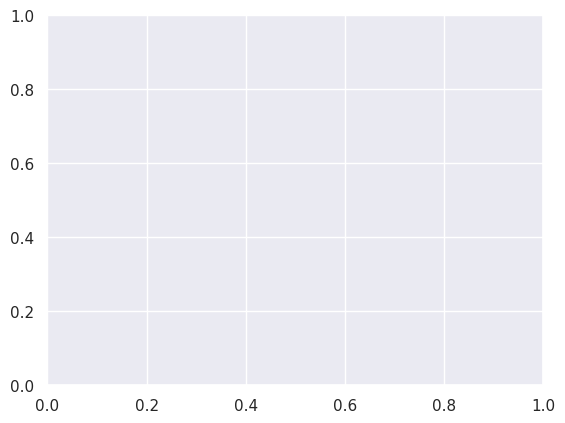

In [ ]:
fig = plt.figure(figsize=(20, 10)).suptitle('Customer Market Segmentation', fontsize=25)

# Creating the bar chart
plt.bar(segments_count["segment"], segments_count["count"])

plt.xlabel("Segment")
plt.ylabel("No. of customers")
plt.title('Customer Market Segmentation', fontsize=25)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better visibility if needed
plt.show()

Evidently, there is a group of customers, comprising approximately 15%, known as the "Champions." These customers significantly contribute to the revenue, making it worthwhile to invest in enhancing their experience. Here are some strategies to consider:

1. Provide them with exclusive benefits, such as access to limited-edition products or special discounts, to convey their value to the business.

2. Engage with them using communication strategies similar to those employed for the "Loyal" segment. This may involve turning them into brand ambassadors and offering them a share of the profits for referring new customers.

3. Seek their feedback and insights, as they likely have a deep understanding of the products and services, which can be invaluable for improvement.

In [ ]:
agg_list=["mean", "count", "max"]
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(agg_list)

### **c. Normalisation**
---

In [ ]:
# Rank each metric R , F & M
rfm_data['R_rank'] = rfm_data['Recency'].rank(ascending=False)
rfm_data['F_rank'] = rfm_data['Frequency'].rank(ascending=True)
rfm_data['M_rank'] = rfm_data['Monetary'].rank(ascending=True)
rfm_data.head()
# Normalise each rank with Max rank
rfm_data['R_rank_norm']=(rfm_data['R_rank']/rfm_data['R_rank'].max())*100
rfm_data['F_rank_norm']=(rfm_data['F_rank']/rfm_data['F_rank'].max())*100
rfm_data['M_rank_norm']=(rfm_data['F_rank']/rfm_data['M_rank'].max())*100
rfm_data.head()
# Now apply our equation and create final score **Consolidated Score = 0.15*R_rank_norm + 0.28*F_rank_norm + 0.57M_rank_norm**
rfm_data['RFM_Score']=0.15*rfm_data['R_rank_norm']+0.28*rfm_data['F_rank_norm']+0.57*rfm_data['M_rank_norm']
rfm_data=rfm_data.round(0)
rfm_data.head()


**CLV Interpretations**

Then we segregated score as three segments:

- 0 – 50 – Low valued customer: These customers are about to churn or went into a dormant stage,apply reactivation strategies for them.
- 50 – 75 – Medium valued customer: Send them personalised emails with offers and encourage them to shop more.
- 76 – 100 – High valued customer: They are your loyal customers. So provide constant support via customer service.

Now based on the above scores, a business can apply the differentiation strategy like retention/development/acquisition of different customer segments.

In [ ]:
# ## Customer segments with RFM Model
   # 0 - 50 - Low valued customer
   # 51 - 75 - Medium valued customer
   # 76 - 100 - High valued customer
rfm_data["Customer_segment"]=np.where(rfm_data['RFM_Score'] > 75 ,"High Value Customer",(np.where(rfm_data['RFM_Score'] < 50 , "Low value Customer" ,"Medium Value Customer")))
rfm_data.head()

### **d. K-Means Clustering**
---

In [ ]:
data_clustering = df.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo'    : 'nunique',
                                     'TotalSales' : 'sum'})

data_clustering.columns = ['recency', 'frequency', 'monetary']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler = StandardScaler()
data_scaled = std_scaler.fit_transform(data_clustering)
data_scaled = pd.DataFrame(data_scaled,columns=['recency', 'frequency', 'monetary'])
data_scaled["CustomerID"] = data_clustering.index
data_scaled = data_scaled.set_index("CustomerID",drop=True)

## **e. Elbow Method**
---

To determine the optimal number of clusters, we will use the elbow method.

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(data_scaled)
visualizer.show()

In [ ]:
data_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
data_labels['labels'] = data_labels['labels'].astype('category')

In [ ]:
data_kmeans = data_clustering.copy()
data_kmeans['labels'] = data_labels['labels'].values

In [ ]:
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=1)
kmeans.fit(data_scaled)
centroids = kmeans.cluster_centers_
centroid_data = pd.DataFrame(centroids, columns = list(data_scaled) )
centroid_data

## **f. Cluster Interpretation**
---

In [ ]:
colors = np.array(["blue", "purple","red","green"])
fig  = plt.figure(figsize = (15,15)).suptitle('Plot of Customer\'s Distribution', fontsize=25)
ax = plt.axes(projection='3d')
ax.scatter3D(data_kmeans["recency"], data_kmeans["frequency"], data_kmeans["monetary"], marker='o', c=colors[data_kmeans["labels"].tolist()])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()
plt.show()

In [ ]:
agg_list=["mean", "count", "max",]
data_kmeans[["labels", "recency", "frequency", "monetary"]].groupby("labels").agg(agg_list)

In [ ]:
data_kmeans = data_kmeans.reset_index()
clusters_count = data_kmeans.groupby("labels").agg({"CustomerID": "count"})
clusters_count.reset_index(inplace=True)
clusters_count.columns = ['cluster', 'count']

#Creating the bar plot
plt.bar(clusters_count["cluster"], clusters_count["count"], width=0.4)

#Setting labels for the clusters on the x-axis
plt.xticks(clusters_count["cluster"], clusters_count["cluster"])

plt.xlabel("Cluster")
plt.ylabel("No. of each cluster")
plt.title('Customers Distribution of Clusters', fontsize=25)
plt.show()

In [ ]:
# creating the bar plot

#plt.bar(segments_count["count"], xlabel = segments_count["segment"], autopct='%.0f%%', width = 0.4, height = 0.5)

#plt.xlabel("Segment")
#plt.ylabel("No. of each segment")
#plt.title('Customer Market Segmentation', fontsize=25)
#plt.show()


# Checking abs number of each customer segment
y = sns.histplot(segments_count,bins=20,color='blue',shrink=.8)
y.set(xlabel='count')
y.bar_label(y.containers[0])
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count Customer')
plt.show()

In [ ]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

With KMeans clustering, we have categorised every customer into four distinct clusters, each displaying unique behaviors:

Cluster 0: "Punctual Customers" - These customers make timely and regular purchases on the website.

Cluster 1: "Hibernating Customers" - This group comprises customers who make infrequent purchases, have not shopped recently, and spend the least amount of money.

Cluster 2: "Exceptional Customers" - These are the customers we aim to retain. They exhibit the highest purchase frequency, the most recent activity, and the highest spending.

Cluster 3: "Recent Customers" - This category includes customers who have been active relatively recently and may be worth engaging to maintain their interest.




# <font color='Blue'> **5. Conclusion & Recommendation** </font>
---



**Analysis**
The RFM model's outcomes, specifically the Recency, Frequency, and Monetary attributes, can provide insights into the characteristics and profiles of each segment, based on the stages of the final project work conducted. Utilizing the Recency metric, we can ascertain the time since a customer's last transaction, while the Frequency metric helps gauge the number of transactions made by each customer. The Monetary attribute allows us to understand the total amount spent by customers on online retail within the country.

Addressing customer segmentation challenges, the K-Means method offers a potential solution. However, relying solely on visual cues to determine the optimal number of clusters, as opposed to performance testing, led to the selection of 3 clusters. Subsequently, performance testing, using the difference between the current and previous cluster counts, revealed a significant decline at point 2, indicating the need for re-clustering.


**Recommendation**
In light of this analysis, we recommend enhancing services for customers falling within clusters 1 and 3, as they exhibit the potential to become loyal customers with a high level of profitability. Strategies such as offering after sales services and promotions can be deployed to nurture this customer segment's loyalty. This approach can ultimately help the company reduce costs associated with acquiring new customers, which tend to be higher than retaining existing ones.
